In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [41]:
data=pd.read_csv('/content/drive/MyDrive/datasets/loan_prediction.csv')
#download dataset from: https://www.kaggle.com/datasets/ninzaami/loan-predication
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [45]:
# Handling missing values in Dependents column
data['Dependents'].fillna(0, inplace=True)  # Replace missing values with 0
data['Dependents'] = data['Dependents'].replace('3+', 3)
data['Dependents'] = data['Dependents'].astype(int)



In [46]:
data['Married'] = data.Married.fillna(data.apply(lambda x: 'Yes' if x['CoapplicantIncome'] > 0 else 'No', axis=1))

In [47]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
data.groupby('Gender').mean()

<ipython-input-48-8dd2c07a9ce8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Gender').mean()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,,
Female,0.375000,4643.473214,1108.008929,126.697248,352.293578,0.831683
Male,0.820041,5446.460123,1742.932352,149.265957,339.665272,0.847007


In [49]:
data['ApplicantIncome'].mean()

5403.459283387622

In [50]:
data['Gender'] = data.Gender.fillna(data.apply(lambda x: 'Female' if x['ApplicantIncome'] < data['ApplicantIncome'].mean() else 'Male', axis=1))

In [51]:
data['Self_Employed'] = data.Self_Employed.fillna(data.apply(lambda x: 'Yes' if x['CoapplicantIncome'] == 0 else 'No', axis=1))

In [52]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [54]:
data.Loan_Status = data.Loan_Status.astype(str)
data = data.replace({'Credit_History':{'nan':data.apply(lambda x : '1.0' if x['Loan_Status']=='Y' else '0.0',axis=1)}})

In [55]:
data['Credit_History'] = data.apply(lambda row: 1.0 if row['Loan_Status'] == 'Y' else 0.0 if pd.isnull(row['Credit_History']) else row['Credit_History'], axis=1)


In [56]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
from sklearn.impute import SimpleImputer
numeric_cols = ['LoanAmount', 'Loan_Amount_Term']
numeric_imputer = SimpleImputer(strategy='median') 
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

In [58]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#EDA

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Education', ylabel='count'>

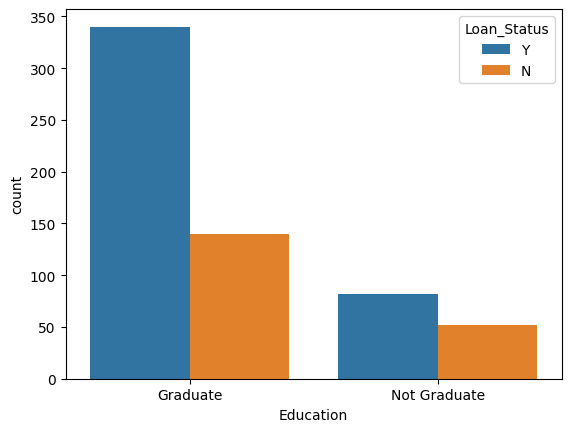

In [60]:
# education and loan status
sns.countplot(x ='Education',hue = 'Loan_Status',data = data)

**Observation**: Graduate applicants have higher chances of getting loan

<Axes: xlabel='Married', ylabel='count'>

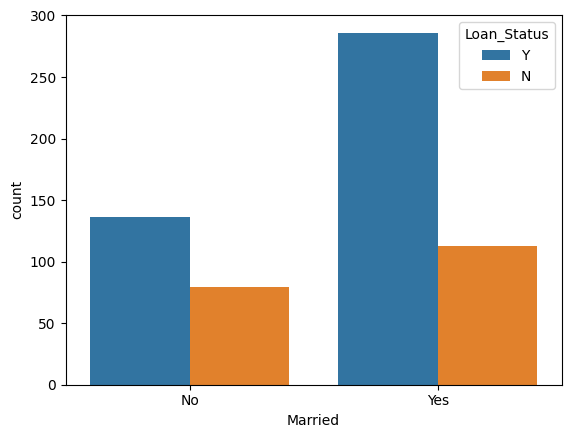

In [61]:
# marital status  and loan status
sns.countplot(x ='Married',hue = 'Loan_Status',data = data)

**Observation**: Married applicants have higher chances of getting loan

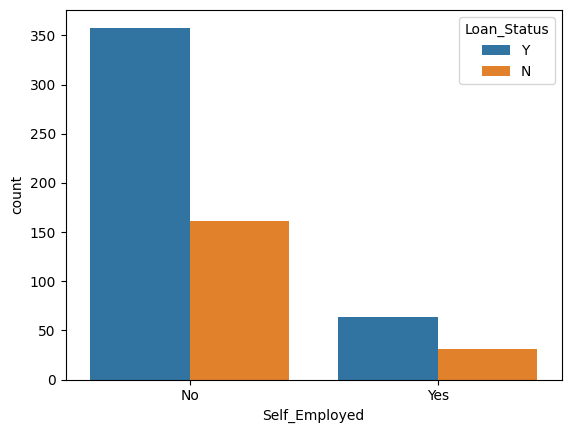

In [62]:
# Self_Employed and loan status
sns.countplot(x ='Self_Employed',hue = 'Loan_Status',data = data)
plt.show()

**Observation**: Self-Employed applicants have lesser chances of getting loan

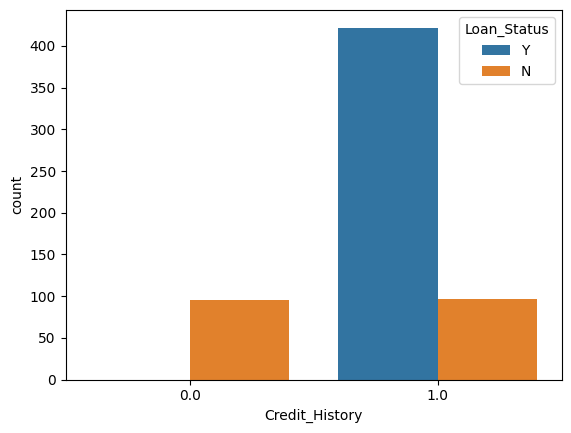

In [63]:
# Credit_History and loan status
sns.countplot(x ='Credit_History',hue = 'Loan_Status',data = data)
plt.show()

**Observation**: Person having no credit history is very less likely to get a loan

             here 0.0 - No
                  1.0 - Yes

<ipython-input-64-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

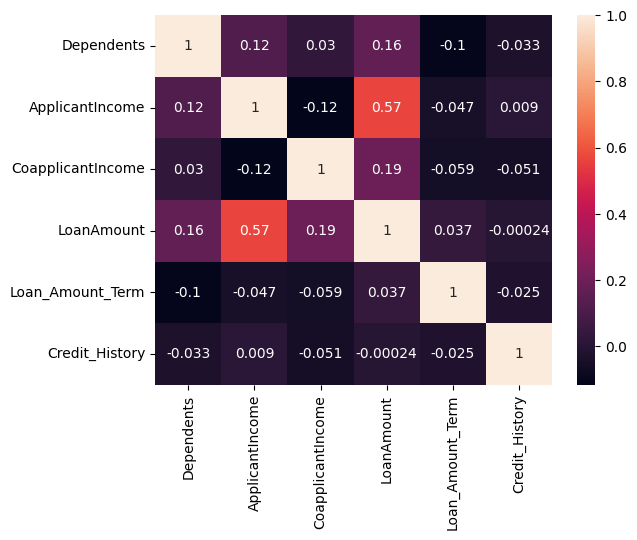

In [64]:
sns.heatmap(data.corr(),annot=True)

## Encoding the non-integer(categorical) features

In [65]:
data.replace({'Gender':{'Female':0,'Male':1}},inplace=True)
data.replace({'Married':{'Yes':1,'No':0}},inplace=True)
data.replace({'Dependents':{'0':0,'1':1,'2':2,'3+':3}},inplace=True)
data.replace({'Education':{'Graduate':0,'Not Graduate':1}},inplace=True)
data.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)
data.replace({'Credit_History':{'1.0':1,'0.0':0}},inplace=True)
data.replace({'Property_Area':{'Semiurban':0,'Urban':1,'Rural':2}},inplace=True)
data.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

# Model building and training

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [67]:
# Step 1: Splitting the Data
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Model Training and Evaluation
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
]

In [68]:
accuracy_scores = {}
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[str(model)] = accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
# Display the accuracy scores
for model, accuracy in accuracy_scores.items():
    print(f"\nThe accuracy of {model} : {accuracy}")


The accuracy of LogisticRegression() : 0.7297297297297297

The accuracy of DecisionTreeClassifier() : 0.8

The accuracy of RandomForestClassifier() : 0.8162162162162162

The accuracy of SVC() : 0.6486486486486487


In [70]:
# Find the model with the highest accuracy
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = next((model for model in models if model== best_model_name), None)
print(best_model_name)



RandomForestClassifier()


#Testing the model on new data

In [71]:
accuracy_scores = {}
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[str(model)] = accuracy

# Find the model with the highest accuracy
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = None
for model in models:
    if str(model) == best_model_name:
        best_model = model
        break

# Prepare new data for prediction
new_data = pd.DataFrame({
    'Gender': ['Male'],
    'Married': ['Yes'],
    'Dependents': [2],
    'Education': ['Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [2000],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': ['Urban']
})

# Perform preprocessing on new data
new_data[numeric_cols] = numeric_imputer.transform(new_data[numeric_cols])
new_data.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True)
new_data.replace({'Married': {'Yes': 1, 'No': 0}}, inplace=True)
new_data.replace({'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3}}, inplace=True)
new_data.replace({'Education': {'Graduate': 0, 'Not Graduate': 1}}, inplace=True)
new_data.replace({'Self_Employed': {'No': 0, 'Yes': 1}}, inplace=True)
new_data.replace({'Credit_History': {'1.0': 1, '0.0': 0}}, inplace=True)
new_data.replace({'Property_Area': {'Semiurban': 0, 'Urban': 1, 'Rural': 2}}, inplace=True)

# Make predictions on new data
predictions = best_model.predict(new_data)

# Display the predictions
for prediction in predictions:
    print(prediction)
    if prediction==1:
      print('This person is eligible for loan sanction')

    else:
      print("This person is not eligible for getting loan")



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1
This person is eligible for loan sanction
